In [1]:
import time
start = time.time()

import pandas as pd
import nltk
from matplotlib import pyplot as plt
import seaborn as sns
from numpy import median
%matplotlib inline

import seaborn as sns

In [2]:
#Import the semi clean dataset.Exporting only the short description
dtype_dic = {'DESCRIPTION': str,'Noun':str,'Modifier':str}
txt_corpus = pd.read_csv('Test_Data.csv', dtype=dtype_dic,encoding = "latin")
txt_corpus.drop_duplicates(subset=None, inplace=True)
txt_corpus = txt_corpus.replace(r'\r',' ', regex=True)
# txt_corpus['DESCRIPTION'] = ' '.join(txt_corpus['DESCRIPTION'].split())
txt_corpus.reset_index(drop=True, inplace=True)

In [3]:
txt_corpus = txt_corpus.sample(frac=1)
txt_corpus = txt_corpus.head(10000)
txt_corpus.shape

(10, 1)

In [4]:
txt_corpus.head()

,Long_Desc
7,"GASKET,SPIRAL WOUND,RWI-RJ,2""\nFILLER MATERIAL..."
9,"GASKET , SPIRAL WOUND FILLER MATERIAL GRAPHI..."
1,"LSDP CONTROL\nSPIRAL WOUND GASKET 24"""""""" X 300..."
2,"MOTOR,22 KW,400-690 KW,DFV180L4/BM/HR/TH\nNO G..."
0,"MOTOR,ELECTRIC,15HP,190/380V,1475,50HZ\nINDUCT..."


In [5]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import string
import re

txt_corpus_new=[]
tokenizer = RegexpTokenizer(r'\w+')
counter = txt_corpus.shape[0]
txt_corpus_new = pd.DataFrame(columns=['Unique_ID','DESCRIPTION','Word_Count','Char_Count','Avg_Word_len','stop_words','Special_Char','No_of_numerics','No_of_Uppercase_words','No_of_Lowercase_words'])
stop_words_list=[]

for i in range(counter):
    if ((i % 1000) == 0):
        print(i)
    word_tokens=[]
    word_tokens = tokenizer.tokenize(txt_corpus.loc[i,'Long_Desc'])
    word_cnt = len(word_tokens)
    
    words=[]
    filtered = ''.join(filter(lambda x: x not in '''!.,;!-()-[]{};:'"\,<>./?@#$%^&*_~''', txt_corpus.loc[i,'Long_Desc']))
    words = [word for word in filtered.split() if word]
    avg = sum(map(len, words))/len(words)
    
    stop_words = set(stopwords.words('english'))
    stop_words_upper=[]
    stop_words_list=[]
    [stop_words_upper.append(i.upper()) if not i.isupper() else stop_words_upper.append(i) for i in stop_words]
    stop_words_list = [w for w in word_tokens if w in stop_words_upper] 
    n_stop_words = len(stop_words_list)
    
    special_char=0
    special_char = len(re.sub('[\w]+' ,'', txt_corpus.loc[i,'Long_Desc']))
    
    isdigit = 0
    isdigit = sum(c.isdigit() for c in txt_corpus.loc[i,'Long_Desc'])
    
    uppercase_words = sum(map(str.isupper, word_tokens))
    lowercase_words = sum(map(str.islower, word_tokens))

    txt_corpus_new = txt_corpus_new.append({'Unique_ID':i,'DESCRIPTION': txt_corpus.loc[i,'Long_Desc'],'Word_Count':word_cnt ,'Char_Count': len(txt_corpus.loc[i,'Long_Desc']),'Avg_Word_len': avg,'stop_words': n_stop_words,'Special_Char': special_char,'No_of_numerics': isdigit,'No_of_Uppercase_words': uppercase_words,'No_of_Lowercase_words': lowercase_words}, ignore_index=True)

txt_corpus_new.head()


0


,Unique_ID,DESCRIPTION,Word_Count,Char_Count,Avg_Word_len,stop_words,Special_Char,No_of_numerics,No_of_Uppercase_words,No_of_Lowercase_words
0,0,"MOTOR,ELECTRIC,15HP,190/380V,1475,50HZ\nINDUCT...",27,158,6.550000,0,27,29,19,0
1,1,"LSDP CONTROL\nSPIRAL WOUND GASKET 24"""""""" X 300...",52,263,4.340909,2,72,30,40,0
2,2,"MOTOR,22 KW,400-690 KW,DFV180L4/BM/HR/TH\nNO G...",26,118,5.866667,2,30,29,17,0
3,3,GASKET SPIRAL WOUND SIZE GRAPHITE FILLER MATER...,95,526,4.568182,10,124,29,78,1
4,4,"MOTOR,7.5 KW,400/690 V D/Y,14.3/8.27A\nMOTOR F...",34,151,5.850000,3,34,34,19,0


Plotting descriptive statistics (Double Click for better view of the graphs)
============================================================================

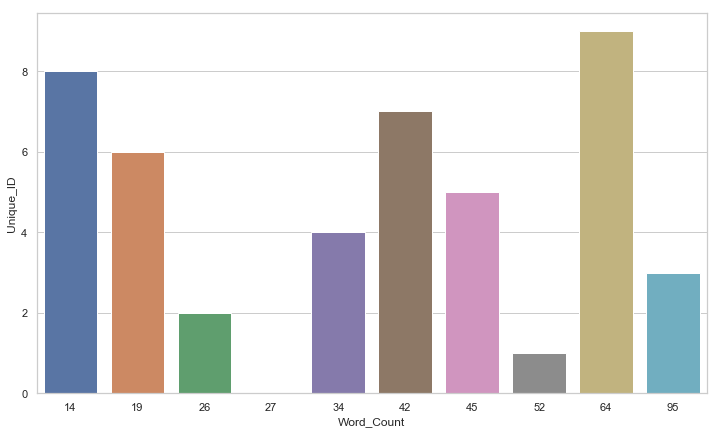

In [6]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('ggplot')
sns.set(style="whitegrid")
ax = sns.barplot(x="Word_Count", y="Unique_ID", data=txt_corpus_new)

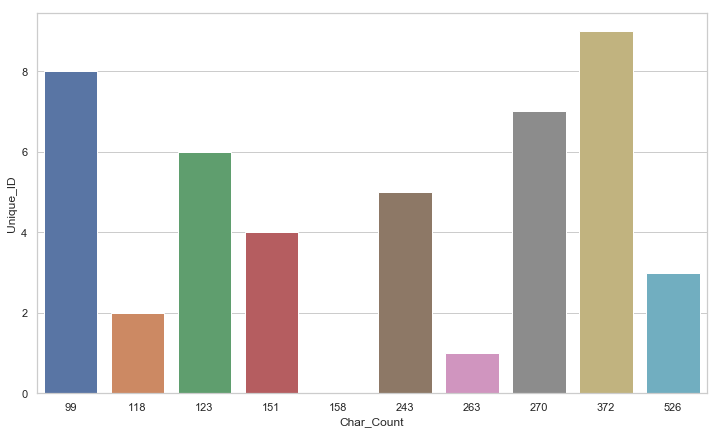

In [7]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('ggplot')
sns.set(style="whitegrid")
ax = sns.barplot(x="Char_Count", y="Unique_ID", data=txt_corpus_new)


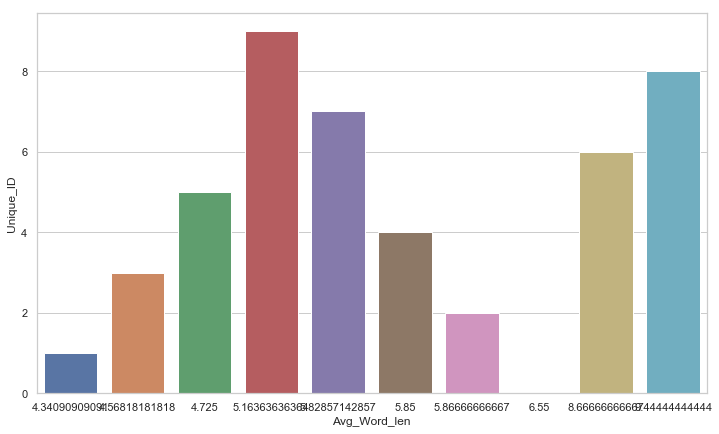

In [8]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('ggplot')
sns.set(style="whitegrid")
ax = sns.barplot(x="Avg_Word_len", y="Unique_ID", data=txt_corpus_new)


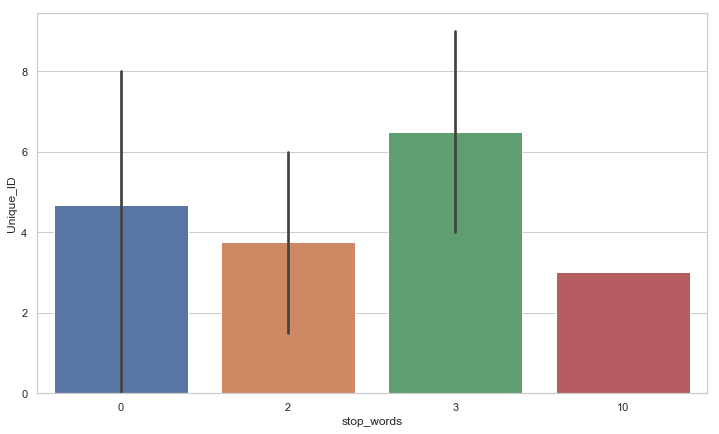

In [9]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('ggplot')
sns.set(style="whitegrid")
ax = sns.barplot(x="stop_words", y="Unique_ID", data=txt_corpus_new)


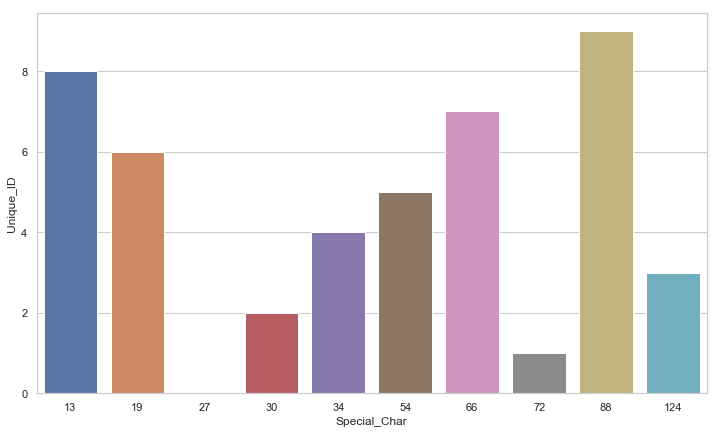

In [10]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('ggplot')
sns.set(style="whitegrid")
ax = sns.barplot(x="Special_Char", y="Unique_ID", data=txt_corpus_new)

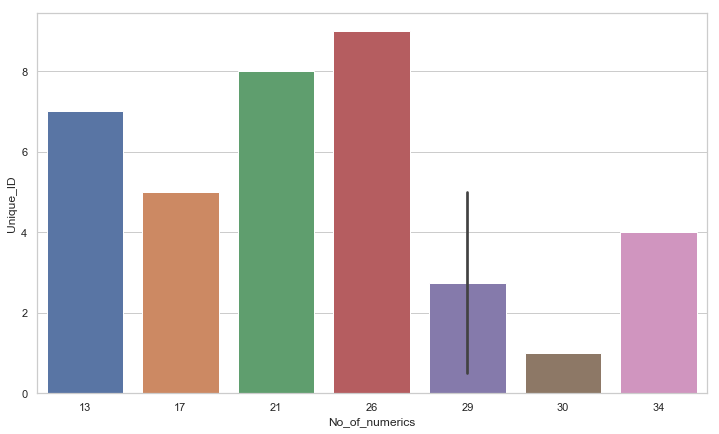

In [11]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('ggplot')
sns.set(style="whitegrid")
ax = sns.barplot(x="No_of_numerics", y="Unique_ID", data=txt_corpus_new)


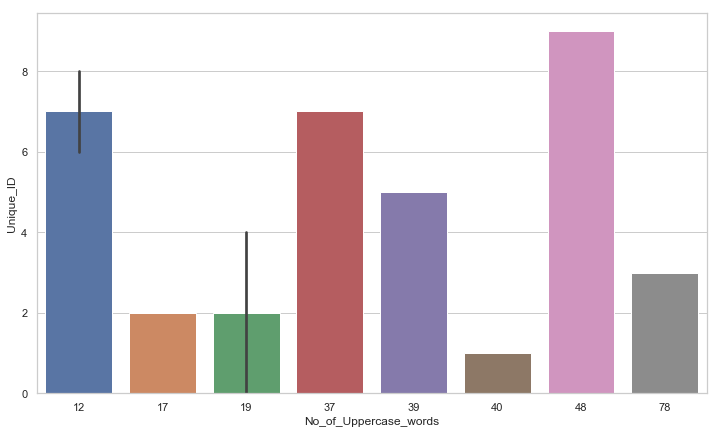

In [12]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('ggplot')
sns.set(style="whitegrid")
ax = sns.barplot(x="No_of_Uppercase_words", y="Unique_ID", data=txt_corpus_new)


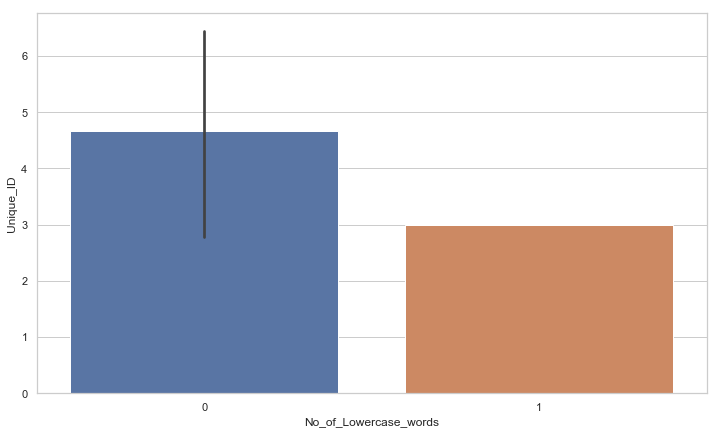

In [13]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.style.use('ggplot')
sns.set(style="whitegrid")
ax = sns.barplot(x="No_of_Lowercase_words", y="Unique_ID", data=txt_corpus_new)


In [14]:
end = time.time()
temp = end-start
hours = temp//3600
temp = temp - 3600*hours
minutes = temp//60
seconds = temp - 60*minutes
print(hours,':',minutes,':',seconds)

0.0 : 0.0 : 11.193504333496094


In [15]:
#df_class = pd.read_csv('output_of_taxonomy_22oct.xlsx',sep='\t')
# dq_df = pd.concat([txt_corpus,txt_corpus_new,df_class],axis=1)
# dq_df.to_csv('dq_df.csv')

xl_file = pd.ExcelFile('output_of_taxonomy_22oct.xlsx')
dfs = {sheet_name: xl_file.parse(sheet_name) for sheet_name in xl_file.sheet_names}

In [16]:
#for i in range(dq_df1.shape[0]):
dq_df1 = dfs['GASKET_SPIRAL_WOUND']
total_columns=len(dq_df1.iloc[:,7:].columns)
print(total_columns)
dq_df1['Completeness_%'] = dq_df1.iloc[:,7:].isnull().sum(axis=1)
dq_df1['Completeness_%']= (dq_df1['Completeness_%'] / total_columns) * 100

10


In [17]:
dq_df1

,PROD_ID,MATERIAL_DESC,NOUN,MODIFIER,LONG_DESCRIPTION,SHORT_DESCRIPTION,EXCEPTION,FILLER MATERIAL,INNER RING MATERIAL,NA,OUTER RING MATERIAL,PIPE SIZE,PRESSURE RATING,SIZE,STYLE,THICKNESS,WINDING MATERIAL,Completeness_%
0,1001,"LSDP CONTROL\nSPIRAL WOUND GASKET 24"""""""" X 300...",GASKET,SPIRAL WOUND,"*** GASKET , SPIRAL WOUND *** \n\nFILLER MATER...","GASKET , SPL WND: CERAMIC,SS,23,3/4"""",3/4"""",SS",LSDP CONTROL 24 X 300 # RF X 4.5THK . 316L SWG...,CERAMIC,SS,NaN,23,"3/4""""",NaN,"3/4""""",NaN,NaN,SS,40.0
1,1003,GASKET SPIRAL WOUND SIZE GRAPHITE FILLER MATER...,GASKET,SPIRAL WOUND,"*** GASKET , SPIRAL WOUND *** \n\nFILLER MATER...","GASKET , SPL WND: INNER,MONEL,STEEL,10"""""""",150...",LB 10-3/8 ID X 15 OD CG FURON RW LAMONS WR C N...,INNER,MONEL,NaN,STEEL,"10""""""""",1500,GRAPHITE,FLEXITALLIC,"1/16""""""""",HASTELLOY,10.0
2,1005,"LSDP CONTROL\nSPIRAL WOUND GASKET 8"""""""" X 150#...",GASKET,SPIRAL WOUND,"*** GASKET , SPIRAL WOUND *** \n\nFILLER MATER...","GASKET , SPL WND: GRAPHITE,SS,MATERIAL,150,LAM...",LSDP CONTROL 8 X # RF X 4.5THK . 316L S.W.G FI...,GRAPHITE,SS,NaN,MATERIAL,NaN,150,NaN,LAMONS MW,"1/8""""",SS,30.0
3,1007,"GASKET,SPIRAL WOUND,RWI-RJ,2""\nFILLER MATERIAL...",GASKET,SPIRAL WOUND,"*** GASKET , SPIRAL WOUND *** \n\nFILLER MATER...","GASKET , SPL WND: PTFE,SS304,STEEL,2"""""""""""""""",RWI",RWI-RJ FOR REPLACEMENT OF JOINT TYPE RWI-RJ RA...,PTFE,SS304,NaN,STEEL,NaN,NaN,"2""""""""""""""""",RWI,NaN,NaN,50.0
4,1009,"GASKET , SPIRAL WOUND FILLER MATERIAL GRAPHI...",GASKET,SPIRAL WOUND,"*** GASKET , SPIRAL WOUND *** \n\nFILLER MATER...","GASKET , SPL WND: GRAPHITE,3/4,300 LB,7,FLEXIT...",7-1/2 ID X 8-1/2 OD CG 600 GASKETS FOR FLANGE ...,GRAPHITE,NaN,NaN,NaN,3/4,300 LB,7,FLEXITALLIC,"1/16""""",INCONEL,30.0
